In [9]:
import numpy as np
import pandas as pd
import spacy
from spacy import displacy
import seaborn as sns
from matplotlib import pyplot as plt

# reading the csv data file
articles = pd.read_csv("medium_articles_v3.csv")
display(articles.head(10))
print("Shape of dataframe : {}".format(articles.shape))

,link,title,sub_title,author,reading_time,text,id
0,https://towardsdatascience.com/ensemble-method...,"Ensemble methods: bagging, boosting and stacking",Understanding the key concepts of ensemble lea...,Joseph Rocca,20,This post was co-written with Baptiste Rocca.\...,1
1,https://towardsdatascience.com/understanding-a...,Understanding AUC - ROC Curve,"In Machine Learning, performance measurement i...",Sarang Narkhede,5,"In Machine Learning, performance measurement i...",2
2,https://towardsdatascience.com/how-to-work-wit...,How to work with object detection datasets in ...,"A comprehensive guide to defining, loading, ex...",Eric Hofesmann,10,Microsoft's Common Objects in Context dataset ...,3
3,https://towardsdatascience.com/11-dimensionali...,11 Dimensionality reduction techniques you sho...,Reduce the size of your dataset while keeping ...,Rukshan Pramoditha,16,"In both Statistics and Machine Learning, the n...",4
4,https://towardsdatascience.com/the-time-series...,The Time Series Transformer,Attention Is All You Need they said. Is it a m...,Theodoros Ntakouris,6,Attention Is All You Need they said. Is it a m...,5
5,https://netflixtechblog.com/learning-a-persona...,Learning a Personalized Homepage,how to best tailor each member's homepage to m...,Netflix Technology Blog,15,by Chris Alvino and Justin Basilico\nAs we've ...,6
6,https://towardsdatascience.com/6-data-science-...,6 Data Science Certificates To Level Up Your C...,Pump up your portfolio and get closer to your ...,Sara A. Metwalli,6,Because of the appeal of the field of data sci...,7
7,https://towardsdatascience.com/transformers-ex...,Transformers Explained Visually (Part 2): How ...,A Gentle Guide to the Transformer under the ho...,Ketan Doshi,11,This is the second article in my series on Tra...,8
8,https://medium.com/coders-camp/60-python-proje...,60 Python Projects with Source Code,60 Python Projects with Source code solved and...,Aman Kharwal,2,Python has been in the top 10 popular programm...,9
9,https://towardsdatascience.com/geometric-found...,Geometric foundations of Deep Learning,Geometric Deep Learning is an attempt to unify...,Michael Bronstein,13,This blog post was co-authored with Joan Bruna...,10


Shape of dataframe : (208, 7)


In [6]:
articles.shape

(208, 7)

In [7]:
articles.describe(include='all')

,link,title,sub_title,author,reading_time,text,id
count,208,208,208,208,208.000000,208,208.000000
unique,208,208,204,179,NaN,208,NaN
top,https://towardsdatascience.com/ensemble-method...,"Ensemble methods: bagging, boosting and stacking",Update: This article is part of a series. Chec...,Adam Geitgey,NaN,This post was co-written with Baptiste Rocca.\...,NaN
freq,1,1,4,5,NaN,1,NaN
mean,NaN,NaN,NaN,NaN,12.375000,NaN,107.091346
std,NaN,NaN,NaN,NaN,13.880224,NaN,62.575453
min,NaN,NaN,NaN,NaN,2.000000,NaN,1.000000
25%,NaN,NaN,NaN,NaN,6.000000,NaN,52.750000
50%,NaN,NaN,NaN,NaN,9.000000,NaN,107.500000
75%,NaN,NaN,NaN,NaN,13.000000,NaN,162.250000


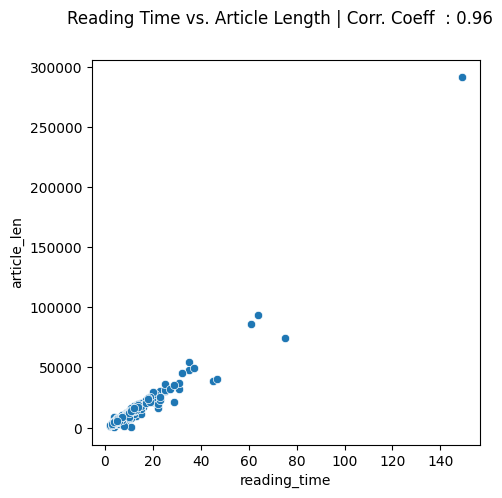

In [11]:
from scipy.stats import pearsonr

articles["article_len"] = articles["text"].apply(lambda x : len(x))
# creating scatterplot
fig, axes = plt.subplots(figsize = (5, 5))
sns.scatterplot(x = articles["reading_time"], y = articles["article_len"])
# Pearson correlation coefficient measures the linear relationship between two set of values.
corr_coeff, _ = pearsonr(articles["reading_time"], articles["article_len"])
# plot title
plt.suptitle("Reading Time vs. Article Length | Corr. Coeff  : {}".format(round(corr_coeff, 2)))
plt.show()

In [12]:
for author, count in dict(articles["author"].value_counts()).items():
    if(count < 2):
        continue
    print("Articles by {} :".format(author))
    for title in articles[articles["author"] == author]["title"].values:
        print(title)
    print("-"*120)

Articles by Adam Geitgey :
Machine Learning is Fun Part 5: Language Translation with Deep Learning and the Magic of Sequences
Machine Learning is Fun! Part 4: Modern Face Recognition with Deep Learning
Machine Learning is Fun! Part 3: Deep Learning and Convolutional Neural Networks
Machine Learning is Fun! Part 2
Machine Learning is Fun Part 6: How to do Speech Recognition with Deep Learning
------------------------------------------------------------------------------------------------------------------------
Articles by Joseph Rocca :
Ensemble methods: bagging, boosting and stacking
Understanding Variational Autoencoders (VAEs)
Understanding Generative Adversarial Networks (GANs)
------------------------------------------------------------------------------------------------------------------------
Articles by Natassha Selvaraj :
I tripled my income with data science. Here's how.
How to Land a Data Analytics Job in 6 Months
Top 10 Data Science Projects for Beginners
-----------------

In [17]:
import contractions